In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import skew

In [ ]:
# Download dataset
path = kagglehub.dataset_download("debasisdotcom/parkinson-disease-detection")

print("Path to dataset files:", path)

In [ ]:
# --- 1. Group Setup and Information (Placeholder - Fill in manually) ---
group_code = "A328"
student_ids = ["23029916", "23091033", "23115654", "23032471"]
github_repo_url = "https://github.com/jaganmamidi2255/A328-7com1079.git"

'Parkinsson disease.csv'


In [ ]:
df = pd.read_csv(path + '/Parkinsson disease.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
df.dtypes

,0
name,object
MDVP:Fo(Hz),float64
MDVP:Fhi(Hz),float64
MDVP:Flo(Hz),float64
MDVP:Jitter(%),float64
MDVP:Jitter(Abs),float64
MDVP:RAP,float64
MDVP:PPQ,float64
Jitter:DDP,float64
MDVP:Shimmer,float64


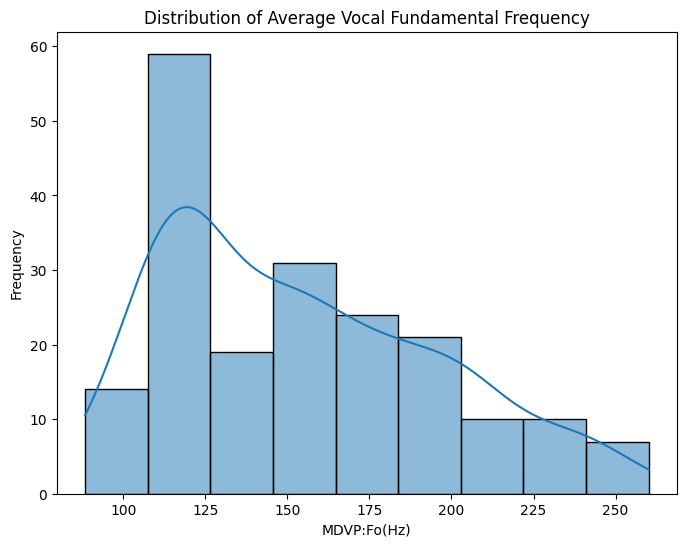

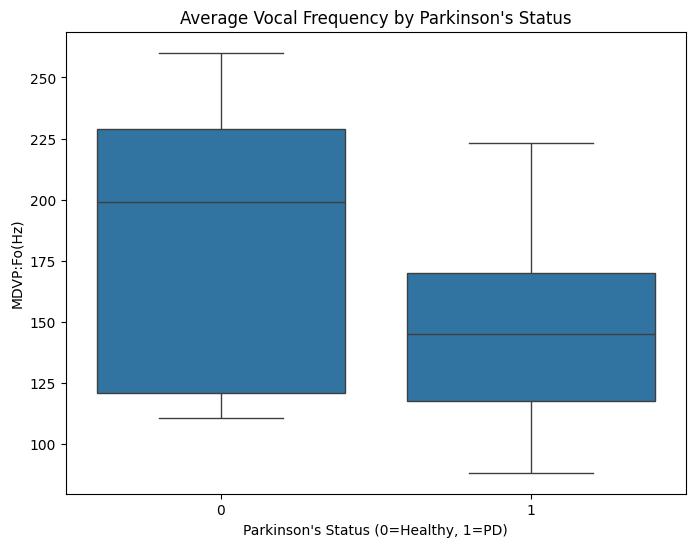

T-statistic: 5.769452074779698
P-value: 3.1219194028363605e-08


In [ ]:
# Histogram (ensure correct axis labels and titles
plt.figure(figsize=(8, 6))
sns.histplot(df['MDVP:Fo(Hz)'], kde=True)  # Overlay a KDE for distribution
plt.title('Distribution of Average Vocal Fundamental Frequency')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Frequency')
plt.savefig('histogram.png')  # Save as PNG
plt.show()

# Comparison of means (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='MDVP:Fo(Hz)', data=df)
plt.title('Average Vocal Frequency by Parkinson\'s Status')
plt.xlabel('Parkinson\'s Status (0=Healthy, 1=PD)')  #  Use descriptive labels
plt.ylabel('MDVP:Fo(Hz)')
plt.savefig('comparison_of_means.png')
plt.show()

# Statistical test ( t-test )
group1 = df[df['status'] == 0]['MDVP:Fo(Hz)']
group2 = df[df['status'] == 1]['MDVP:Fo(Hz)']
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

In [ ]:
# Calculate skewness
data_skewness = skew(df['MDVP:Fo(Hz)'])

print(f"Skewness: {data_skewness}")

# Interpret skewness
if data_skewness > 0:
    skewness_interpretation = "The distribution is positively skewed (right-skewed), meaning there's a longer tail on the right side. Most of the values are clustered towards the lower end, with a few higher outliers."
elif data_skewness < 0:
    skewness_interpretation = "The distribution is negatively skewed (left-skewed), indicating a tail on the left. Values are concentrated towards the higher end with some lower outliers."
else:
    skewness_interpretation = "The distribution is approximately symmetrical. It looks pretty balanced."

print(skewness_interpretation)


Skewness: 0.5871758758264713
The distribution is positively skewed (right-skewed), meaning there's a longer tail on the right side. Most of the values are clustered towards the lower end, with a few higher outliers.


In [ ]:
# Statistical test (t-test)
group1 = df[df['status'] == 0]['MDVP:Fo(Hz)']
group2 = df[df['status'] == 1]['MDVP:Fo(Hz)']
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret t-statistic and p-value
alpha = 0.05 # Significance level

if p_value < alpha:
    t_interpretation = f"The p-value ({p_value:.3f}) is less than our significance level ({alpha}), suggesting that we reject the null hypothesis. This provides evidence that there's a statistically significant difference in average vocal fundamental frequency between healthy individuals and those with Parkinson's. The magnitude of the t-statistic ({t_statistic:.2f}) reflects the size of this difference – the bigger it is, the larger the difference."

else:
     t_interpretation = f"The p-value ({p_value:.3f}) is greater than {alpha}, so we fail to reject the null hypothesis. While there might be a difference, we don’t have enough evidence to call it statistically significant based on this data. "

print(t_interpretation)

T-statistic: 5.769452074779698
P-value: 3.1219194028363605e-08
The p-value (0.000) is less than our significance level (0.05), suggesting that we reject the null hypothesis. This provides evidence that there's a statistically significant difference in average vocal fundamental frequency between healthy individuals and those with Parkinson's. The magnitude of the t-statistic (5.77) reflects the size of this difference – the bigger it is, the larger the difference.
